In [1]:
#Importing packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import sklearn.metrics as sklm
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


In [2]:
#Loading bank-full.csv to pandas df.
df = pd.read_csv("bank-full.csv")
print(df.shape)
df.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [3]:
#Dropping rows with NAs and checking resulting dataframe shape.
df.dropna(inplace=True)
print(df.shape)

(45211, 17)


In [4]:
#Defining X and y variables.
X = df.drop('y', axis = 'columns')
y = np.array(df['y'])

X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown


In [5]:
#Defining column transformer to perform preprocessing steps.
#Note including the "duration" column greatly biases the model
#as mentioned in the dataset documentation. 
col_transformer = ColumnTransformer(
                    transformers=[
                        ('mms', preprocessing.MinMaxScaler(), ['campaign',
                                                 'housing',
                                                 'loan',
                                                 'age',
                                                 'previous',
                                                 'pdays']),
                        ('ohe', OneHotEncoder(), ['education',
                                                 'marital',
                                                 'poutcome',
                                                 'month',
                                                 'job',
                                                 'contact']),
                    ],
                    remainder='drop'
                    )

In [6]:
#Applying transformations of X to X_transformed variable.
X_transformed = col_transformer.fit_transform(X)

In [7]:
#Splitting the data.
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size = 0.2, random_state=0)

In [8]:
#Initializing and applying SMOTE to training data.
smote = SMOTE(sampling_strategy=1,random_state=1, k_neighbors = 5)
X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)

In [9]:
#Fitting logistic regression model.
logistic_mod = linear_model.LogisticRegression(max_iter=2500, 
                                               solver='liblinear')
logistic_mod.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=2500, solver='liblinear')

In [10]:
#Creating Parameter Grid for GridSearch.
param_grid = [
    {'penalty' : ['l2'],
    'C' : np.logspace(0, 5, 20),
    'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter' : [2500]
    }
]

clf = GridSearchCV(logistic_mod, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [11]:
#Implementing GridSearch.
'''best_clf = clf.fit(X_transformed, y)
Fitting 3 folds for each of 100 candidates, totalling 300 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.8min finished'''


'best_clf = clf.fit(X_transformed, y)\nFitting 3 folds for each of 100 candidates, totalling 300 fits\n\n[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.\n[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   14.5s\n[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  1.5min\n[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.8min finished'

In [12]:
#Retreiving best hyperparameter values.
'''best_clf.best_estimator_

LogisticRegression(max_iter=2500, solver='liblinear')'''

"best_clf.best_estimator_\n\nLogisticRegression(max_iter=2500, solver='liblinear')"

In [13]:
#Creating probabilities and previewing the first 15 predictions.
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.79611692 0.20388308]
 [0.37339165 0.62660835]
 [0.79215476 0.20784524]
 [0.88519543 0.11480457]
 [0.74031402 0.25968598]
 [0.60536931 0.39463069]
 [0.49510875 0.50489125]
 [0.54331603 0.45668397]
 [0.52246457 0.47753543]
 [0.70330834 0.29669166]
 [0.58821795 0.41178205]
 [0.76055508 0.23944492]
 [0.31826214 0.68173786]
 [0.67012547 0.32987453]
 [0.53163544 0.46836456]]


In [14]:
#Creating ability to adjust threshold and previewing prediction and y_test.
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.6)
print(np.array(scores[:15]))
print(y_test[:15])

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
#Creating confusion matrix for Logistic Regression.
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[1,1] + '             %5d' % conf[1,0])
    print('Actual negative    %6d' % conf[0,1] + '             %5d' % conf[0,0])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][1] + '        %6d' % metrics[3][0])
    print('Precision  %6.2f' % metrics[0][1] + '        %6.2f' % metrics[0][0])
    print('Recall     %6.2f' % metrics[1][1] + '        %6.2f' % metrics[1][0])
    print('F1         %6.2f' % metrics[2][1] + '        %6.2f' % metrics[2][0])


    
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive       515               548
Actual negative       795              7185

Accuracy  0.85
 
           Positive      Negative
Num case     1063          7980
Precision    0.39          0.93
Recall       0.48          0.90
F1           0.43          0.91


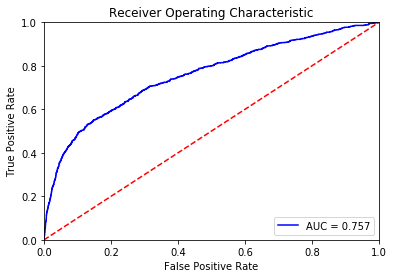

In [16]:
#Creating ROC plot illustrating AUC.
probs = logistic_mod.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
#Creating RandomForestClassifier with hyperparameters from GridSearch.
rndforest = RandomForestClassifier(bootstrap= True,
 max_depth= 4,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 27,
 random_state= 0)
rndforest = rndforest.fit(X_train_smote, y_train_smote)

In [18]:
#Creating Parameter Grid for GridSearch.
param_grid1 = [
    {'n_estimators' : [int(x) for x in np.linspace(start = 1, stop = 80, num =10)],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [2, 4],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2],
    'bootstrap' : [True, False]
    }
]

In [19]:
'''#Initializing GridSearch.
rf_grid = GridSearchCV(estimator = rndforest, param_grid = param_grid1, cv = 3,
                      verbose = 2, n_jobs=4)
                      
rf_grid.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 320 candidates, totalling 960 fits

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   13.7s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   35.7s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  1.7min finished'''


'#Initializing GridSearch.\nrf_grid = GridSearchCV(estimator = rndforest, param_grid = param_grid1, cv = 3,\n                      verbose = 2, n_jobs=4)\n                      \nrf_grid.fit(X_train_smote, y_train_smote)\n\nFitting 3 folds for each of 320 candidates, totalling 960 fits\n\n[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.\n[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.7s\n[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   13.7s\n[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   35.7s\n[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.0min\n[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  1.7min finished'

In [20]:
'''#Retreiving best hyperparameter values.
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 27}'''

"#Retreiving best hyperparameter values.\nrf_grid.best_params_\n\n{'bootstrap': False,\n 'max_depth': 4,\n 'max_features': 'auto',\n 'min_samples_leaf': 1,\n 'min_samples_split': 2,\n 'n_estimators': 27}"

In [21]:
#Creating probabilities and previewing the first 15 predictions.
probabilities1 = rndforest.predict_proba(X_test)
print(probabilities1[:15,:])

[[0.5636485  0.4363515 ]
 [0.51345656 0.48654344]
 [0.635159   0.364841  ]
 [0.5682256  0.4317744 ]
 [0.61936932 0.38063068]
 [0.56368603 0.43631397]
 [0.55243809 0.44756191]
 [0.5388283  0.4611717 ]
 [0.49412884 0.50587116]
 [0.61431893 0.38568107]
 [0.55452658 0.44547342]
 [0.47621339 0.52378661]
 [0.33890389 0.66109611]
 [0.67052094 0.32947906]
 [0.50079145 0.49920855]]


In [22]:
#Creating ability to adjust threshold and previewing prediction and y_test.
def score_model1(probs1, threshold1):
    return np.array([1 if x > threshold1 else 0 for x in probs1[:,1]])
scores1 = score_model1(probabilities1, 0.55)
print(np.array(scores1[:15]))
print(y_test[:15])

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
#Creating confusion matrix for RandomForestClassifier.
def print_metrics1(labels1, scores1):
    metrics1 = sklm.precision_recall_fscore_support(labels1, scores1)
    conf1 = sklm.confusion_matrix(labels1, scores1)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf1[1,1] + '             %5d' % conf1[1,0])
    print('Actual negative    %6d' % conf1[0,1] + '             %5d' % conf1[0,0])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels1, scores1))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics1[3][1] + '        %6d' % metrics1[3][0])
    print('Precision  %6.2f' % metrics1[0][1] + '        %6.2f' % metrics1[0][0])
    print('Recall     %6.2f' % metrics1[1][1] + '        %6.2f' % metrics1[1][0])
    print('F1         %6.2f' % metrics1[2][1] + '        %6.2f' % metrics1[2][0])


    
print_metrics1(y_test, scores1) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive       480               583
Actual negative       752              7228

Accuracy  0.85
 
           Positive      Negative
Num case     1063          7980
Precision    0.39          0.93
Recall       0.45          0.91
F1           0.42          0.92


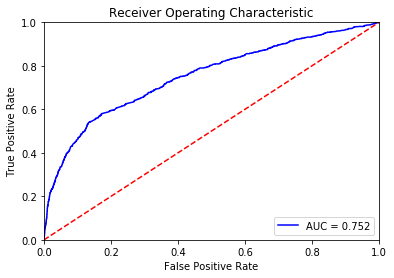

In [24]:
#Creating ROC plot illustrating AUC.
probs1 = rndforest.predict_proba(X_test)
preds1 = probs1[:,1]
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.3f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()